# Analysis of results from Buchi automata experiments
First, let us import some essential packages


In [7]:
import datetime
import pandas as pd
import re as re
import tabulate as tab
import math

import evallib as el               # this contains auxiliary functionality for evaluation of experiments

ModuleNotFoundError: No module named 'plotnine'

And we define other useful auxiliary functions.

In [2]:
# Connect a DF with results to DF with classification of inputs
def connect_with_classification(df, clas_file):
    df_clas = el.read_file(clas_file)
    df = pd.merge(df, df_clas, on='name')
    return df


# prints results of classification
def print_classification(df):
    df_empty = df[df['empty'] == 1]
    df_deterministic = df[df['deterministic'] == 1]
    df_deterministic_weak = df[(df['deterministic'] == 1) & (df['weak'] == 1)]
    df_inherently_weak = df[df['inherently weak'] == 1]
    df_semi_deterministic = df[df['semi deterministic'] == 1]
    df_terminal = df[df['terminal'] == 1]
    df_unambiguous = df[df['unambiguous'] == 1]
    df_weak = df[df['weak'] == 1]
    df_very_weak = df[df['very weak'] == 1]
    df_elevator = df[df['elevator'] == 1]
    df_elevator_not_semi = df[(df['elevator'] == 1) & (df['semi deterministic'] == 0)]

    print(f"! Classification of input automata")
    print(f"!   # empty: {len(df_empty)}")
    print(f"!   # deterministic: {len(df_deterministic)}")
    print(f"!   # deterministic weak: {len(df_deterministic_weak)}")
    print(f"!   # inherently weak: {len(df_inherently_weak)}")
    print(f"!   # semi-deterministic: {len(df_semi_deterministic)}")
    print(f"!   # terminal: {len(df_terminal)}")
    print(f"!   # unambiguous: {len(df_unambiguous)}")
    print(f"!   # weak: {len(df_weak)}")
    print(f"!   # very weak: {len(df_very_weak)}")
    print(f"!   # elevator: {len(df_elevator)}")
    print(f"!   # elevator not semideterministic: {len(df_elevator_not_semi)}")


# remove too easy automata from processing
def filter_non_easy(df):
    # sanitization based on properties of input automata
    #df = df[df['semi deterministic'] == 1]
    df = df[df['semi deterministic'] == 0]
    df = df[df['inherently weak'] == 0]
    df = df[df['unambiguous'] == 0]
    return df


# table to LaTeX file
def table_to_file(table, headers, out_file):
    with open(f"plots/{out_file}.tex", mode='w') as fl:
        print(tab.tabulate(table, headers=headers, tablefmt="latex"), file=fl)

In [3]:
# load results
def load_results(filename):
    df = el.read_file(filename)

    print(f"! Loaded results")
    print(f"!   file:  {filename}")
    print(f"!   time:  {datetime.datetime.now()}")
    print(f"!   # of automata: {len(df)}")
    return df

Then, we set some parameters of the experiments (I know, it would be better if they were in the CSV file... it's on the TODO list).

In [4]:
# in seconds
TIMEOUT = 300
TIMEOUT_VAL = TIMEOUT * 1.1
TIME_MIN = 0.01

FILENAME="./random-all-to300-merged.csv"
CLASSIFICATION="../../../automata/random/goal-15-red-autfilt-hoa-compact-classification.csv"

pd.set_option('display.max_columns', 500)

In [5]:
df = load_results(FILENAME)

NameError: name 'el' is not defined

In [22]:
df = connect_with_classification(df, CLASSIFICATION)
print_classification(df)

! Classification of input automata
!   # empty: 0
!   # deterministic: 7026
!   # deterministic weak: 7015
!   # inherently weak: 8311
!   # semi-deterministic: 7100
!   # terminal: 6915
!   # unambiguous: 7116
!   # weak: 7460
!   # very weak: 6930
!   # elevator: 7181
!   # elevator not semideterministic: 81


We should now remove easy automata from the data set

In [23]:
df = filter_non_easy(df)
print(f'! # of automata after sanitization: {len(df)}')
df

! # of automata after sanitization: 2592


,name,ranker-maxr-delayopt-runtime,ranker-maxr-delayopt-nopost-States,ranker-maxr-delayopt-nopost-Transitions,ranker-maxr-delayopt-States,ranker-maxr-delayopt-Transitions,ranker-maxr-delayopt-Engine,ranker-maxr-delayopt-Time,ranker-maxr-delayopt-autfilt-States,seminator-runtime,seminator-States,seminator-autfilt-States,spot-runtime,spot-States,spot-autfilt-States,safra-runtime,safra-autfilt-States,safra-States,safra-Time,piterman-runtime,piterman-autfilt-States,piterman-States,piterman-Time,schewe-runtime,schewe-autfilt-States,schewe-States,schewe-Time,fribourg-runtime,fribourg-autfilt-States,fribourg-States,fribourg-Time,ltl2dstar-runtime,ltl2dstar-States,ltl2dstar-autfilt-States,roll-runtime,roll-States,roll-autfilt-States,ranker-maxr-runtime,ranker-maxr-nopost-States,ranker-maxr-nopost-Transitions,ranker-maxr-States,ranker-maxr-Transitions,ranker-maxr-Engine,ranker-maxr-Time,ranker-maxr-autfilt-States,ranker-rrestr-runtime,ranker-rrestr-nopost-States,ranker-rrestr-nopost-Transitions,ranker-rrestr-States,ranker-rrestr-Transitions,ranker-rrestr-Engine,ranker-rrestr-Time,ranker-rrestr-autfilt-States,ranker-maxr-bo-runtime,ranker-maxr-bo-nopost-States,ranker-maxr-bo-nopost-Transitions,ranker-maxr-bo-States,ranker-maxr-bo-Transitions,ranker-maxr-bo-Engine,ranker-maxr-bo-Time,ranker-maxr-bo-autfilt-States,ranker-elevator-runtime,ranker-elevator-Max rank,ranker-elevator-nopost-States,ranker-elevator-Generated-trans,ranker-elevator-States,ranker-elevator-Transitions,ranker-elevator-nopost-Transitions-to-tight,ranker-elevator-Elevator-automaton,ranker-elevator-States-before-complementation,ranker-elevator-Elevator-states,ranker-elevator-Engine,ranker-elevator-Time,ranker-elevator-autfilt-States,ranker-eta4-runtime,ranker-eta4-nopost-States,ranker-eta4-Generated-trans,ranker-eta4-States,ranker-eta4-Transitions,ranker-eta4-nopost-Transitions-to-tight,ranker-eta4-Elevator-automaton,ranker-eta4-States-before-complementation,ranker-eta4-Elevator-states,ranker-eta4-Engine,ranker-eta4-Time,ranker-eta4-autfilt-States,ranker-elevator-eta4-runtime,ranker-elevator-eta4-Max rank,ranker-elevator-eta4-nopost-States,ranker-elevator-eta4-Generated-trans,ranker-elevator-eta4-States,ranker-elevator-eta4-Transitions,ranker-elevator-eta4-nopost-Transitions-to-tight,ranker-elevator-eta4-Elevator-automaton,ranker-elevator-eta4-States-before-complementation,ranker-elevator-eta4-Elevator-states,ranker-elevator-eta4-Engine,ranker-elevator-eta4-Time,ranker-elevator-eta4-autfilt-States,empty,deterministic,inherently weak,semi deterministic,terminal,unambiguous,weak,very weak,elevator
0,automata/random/goal-15-red-autfilt-hoa-compac...,3.57,1139.0,2178.0,709.0,1895.0,Ranker,1.95,263.0,NaN,NaN,NaN,0.41,337.0,248.0,NaN,NaN,NaN,NaN,8.45,249.0,437.0,7.64,25.85,411.0,6280.0,21.22,8.21,371.0,734.0,7.21,4.44,7118.0,353.0,NaN,NaN,NaN,2.82,642.0,1171.0,462.0,1138.0,Ranker,1.58,225.0,8.56,7959.0,16709.0,2571.0,8350.0,Ranker,2.25,429.0,1.72,642.0,1171.0,462.0,1138.0,Ranker,0.0,225.0,1.56,4.0,642.0,1171.0,462.0,1138.0,232.0,No,11.0,0.0,Ranker,0.85,225.0,1.46,573.0,1022.0,416.0,1001.0,232.0,No,11.0,0.0,Ranker,0.86,213.0,1.42,4.0,573.0,1022.0,416.0,1001.0,232.0,No,11.0,0.0,Ranker,0.81,213.0,0,0,0,0,0,0,0,0,0
1,automata/random/goal-15-red-autfilt-hoa-compac...,0.90,405.0,807.0,300.0,862.0,Ranker,0.86,51.0,0.41,363.0,151.0,0.10,112.0,93.0,4.93,93.0,222.0,4.84,5.02,75.0,128.0,4.96,32.52,72.0,14003.0,32.28,4.90,48.0,239.0,4.88,0.08,212.0,84.0,NaN,NaN,NaN,0.24,116.0,229.0,93.0,235.0,Ranker,0.19,44.0,0.32,733.0,1292.0,123.0,324.0,Ranker,0.27,45.0,0.39,116.0,229.0,93.0,235.0,Ranker,0.0,44.0,0.26,3.0,116.0,229.0,93.0,235.0,47.0,No,10.0,0.0,Ranker,0.21,44.0,0.21,99.0,200.0,69.0,169.0,47.0,No,10.0,0.0,Ranker,0.17,44.0,0.24,3.0,99.0,200.0,69.0,169.0,47.0,No,10.0,0.0,Ranker,0.20,44.0,0,0,0,0,0,0,0,0,0
2,automata/random/goal-15-red-autfilt-hoa-compac...,0.03,42.0,102.0,38.0,104.0,Ranker,0.01,21.0,0.03,48.0,27.0,0.02,32.0,27.0,5.01,40.0,89.0,4.97,5.23,24.0,53.0,5.21,4.79,21.0,44.0,4.78,4

Let us now compute some summary statistics

In [25]:
summary_states = dict()
for col in df.columns:
    if re.search('-States$', col) or re.search('-runtime$', col):
        summary_states[col] = dict()
        summary_states[col]['max'] = df[col].max()
        summary_states[col]['min'] = df[col].min()
        summary_states[col]['mean'] = df[col].mean()
        summary_states[col]['median'] = df[col].median()
        summary_states[col]['std'] = df[col].std()
        summary_states[col]['timeouts'] = df[col].isna().sum()

df_summary_states = pd.DataFrame(summary_states).transpose()

################  states of complements ##################
interesting = ["ranker-maxr-nopost",
               "ranker-rrestr-nopost",
               "schewe",
               "ranker-maxr-autfilt",
               "ranker-maxr-bo-autfilt",
               "piterman-autfilt",
             #      "piterman-gff-autfilt",
               "safra-autfilt",
               "spot-autfilt",
               "fribourg-autfilt",
               "ltl2dstar-autfilt",
               "seminator-autfilt",
               "roll-autfilt",
               "ranker-eta4-nopost",
               "ranker-elevator-nopost",
               "ranker-elevator-eta4-nopost",
               "ranker-eta4-autfilt",
               "ranker-elevator-autfilt",
               "ranker-elevator-eta4-autfilt",
              ]

df_summary_states.loc[[x + '-States' for x in interesting]]

,max,min,mean,median,std,timeouts
ranker-maxr-nopost-States,319119.0,5.0,8687.722670,197.0,29076.871000,360.0
ranker-rrestr-nopost-States,330608.0,5.0,9841.045177,221.5,32607.103589,954.0
schewe-States,67780.0,7.0,5495.314303,774.5,10824.709389,928.0
ranker-maxr-autfilt-States,1239.0,1.0,56.405018,29.0,99.985718,360.0
ranker-maxr-bo-autfilt-States,1706.0,1.0,68.035728,29.0,123.335725,17.0
piterman-autfilt-States,1322.0,1.0,81.559690,34.0,138.565858,12.0
safra-autfilt-States,1648.0,1.0,91.186524,35.0,165.278063,158.0
spot-autfilt-States,2028.0,1.0,84.928267,32.0,153.828791,13.0
fribourg-autfilt-States,2779.0,1.0,104.259156,31.0,215.142182,80.0
ltl2dstar-autfilt-States,1850.0,1.0,81.738830,34.5,140.242886,130.0


Let us now evaluate the runtime

In [26]:
interesting = [x for x in interesting if not 'nopost' in x]
interesting = [x.replace('-autfilt', '') for x in interesting]
df_summary_states.loc[[x + '-runtime' for x in interesting]]

,max,min,mean,median,std,timeouts
schewe-runtime,426.30,2.88,24.277764,7.390,48.115537,928.0
ranker-maxr-runtime,280.26,0.01,10.726022,1.045,28.142584,360.0
ranker-maxr-bo-runtime,191.77,0.01,9.663371,3.620,16.010756,17.0
piterman-runtime,185.00,3.24,7.388640,6.040,8.143274,12.0
safra-runtime,675.17,3.15,15.048981,6.925,35.428728,158.0
spot-runtime,182.46,0.00,0.991981,0.020,8.593568,13.0
fribourg-runtime,315.98,3.15,19.526441,10.150,32.450684,80.0
ltl2dstar-runtime,297.82,0.00,3.839139,0.050,21.313276,129.0
seminator-runtime,292.51,0.01,11.252004,0.390,34.259559,362.0
roll-runtime,351.24,0.45,37.850013,12.235,63.962925,1106.0


Let us now sanitize timeouts and other fishy values in order to have better plots.

In [27]:
 # min and max states
states_min = 1
states_max = df_summary_states['max'].max()
states_timeout = states_max * 1.1

# sanitizing NAs
for col in df.columns:
    if re.search('-States$', col):
        df[col].fillna(states_timeout, inplace=True)
        df[col].replace(0, states_min, inplace=True)  # to remove 0 (in case of log graph)

    if re.search('-runtime$', col):
        df[col].fillna(TIMEOUT_VAL, inplace=True)
        df.loc[df[col] < TIME_MIN, col] = TIME_MIN  # to remove 0 (in case of log graph)
        
############# the best solution out of other tools ##########
df['other_min-States'] = df[['safra-autfilt-States',
                             'piterman-autfilt-States',
                             'spot-autfilt-States',
                             'fribourg-autfilt-States',
                             'ltl2dstar-autfilt-States',
                             'seminator-autfilt-States',
                             'roll-autfilt-States']].min(axis=1)

And let's draw some scatter plots!

In [28]:
def scatplot(params):
    size = 8
    if 'xname' not in params:
        params['xname'] = None
    if 'yname' not in params:
        params['yname'] = None
    if 'max' not in params:
        params['max'] = 10000
    if 'tickCount' not in params:
        params['tickCount'] = 5
    if 'filename' not in params:
        params['filename'] = "fig_" + params['x'] + "_vs_" + params['y']

    pl = el.scatter_plot(df,
                         xcol=params['x'] + '-States',
                         ycol=params['y'] + '-States',
                         xname=params['xname'], yname=params['yname'],
                         domain=[states_min, params['max']],
                         tickCount=params['tickCount'],
                         log=True, width=size, height=size)
    return pl

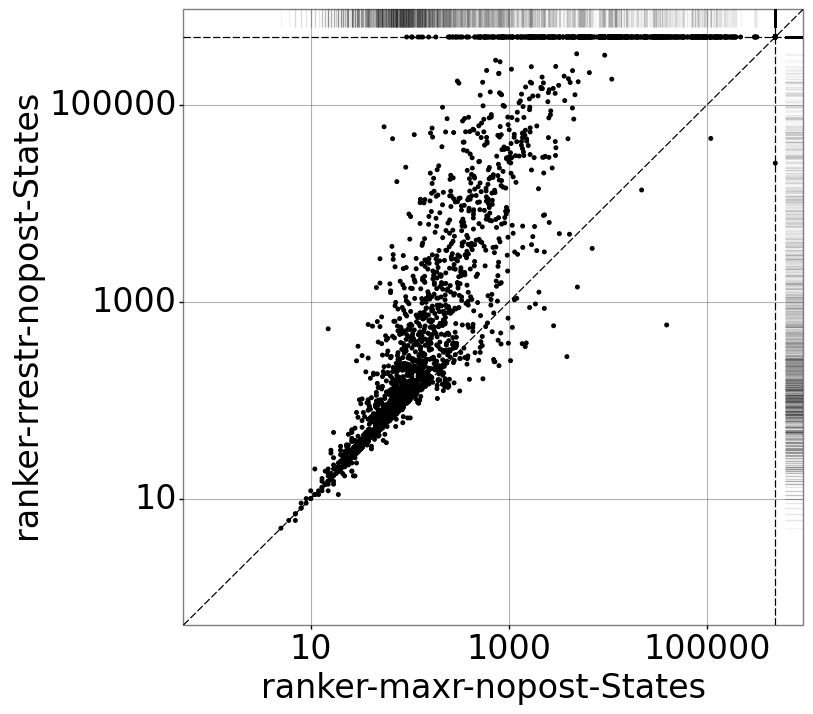

<ggplot: (346584077)>

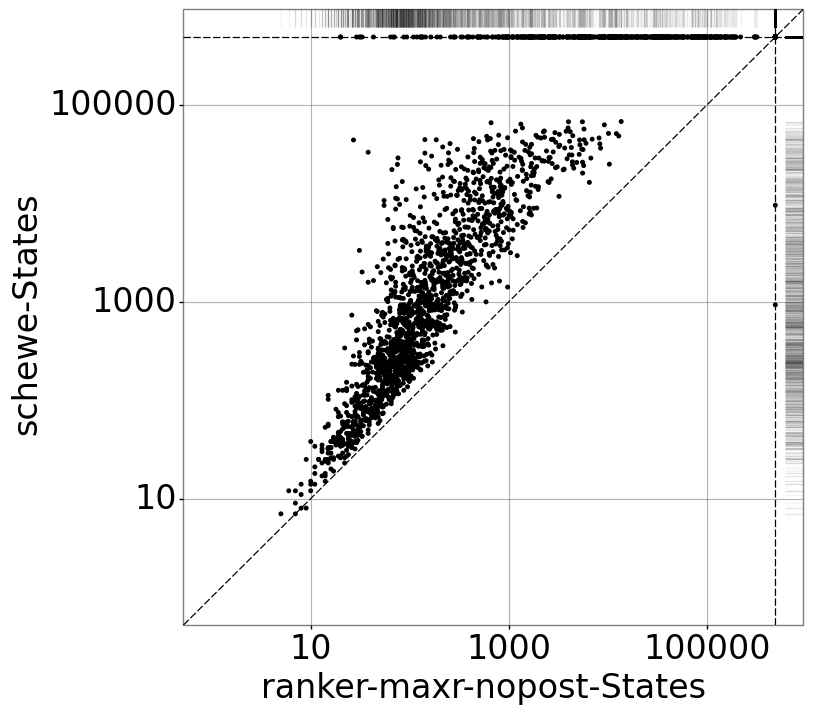

<ggplot: (346571719)>

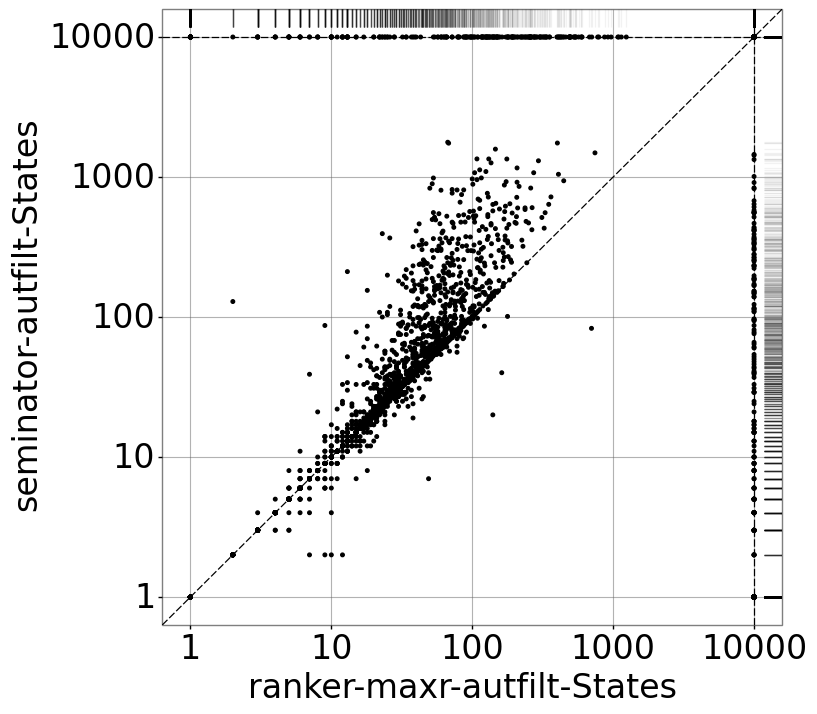

<ggplot: (346732523)>

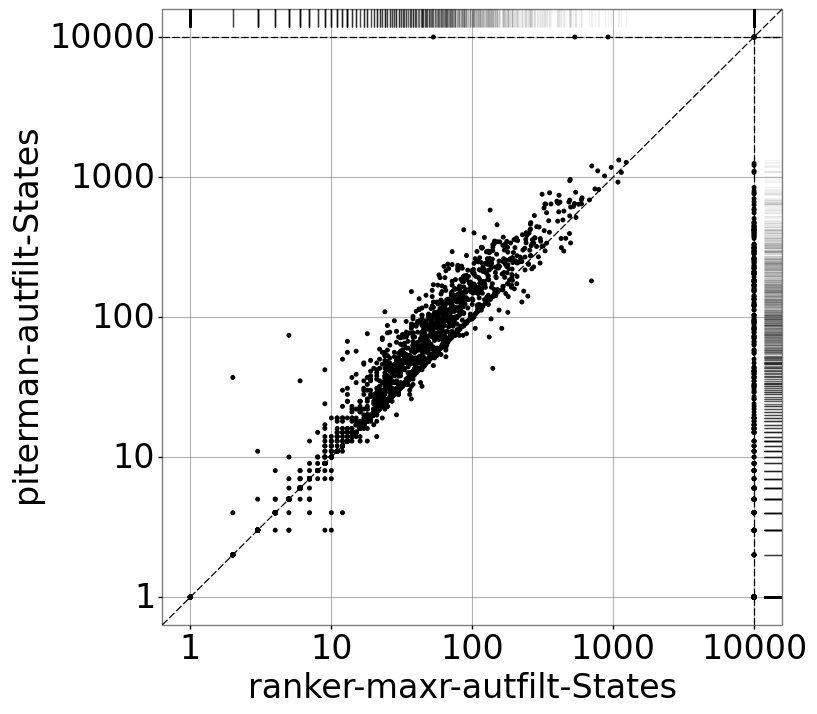

<ggplot: (347073172)>

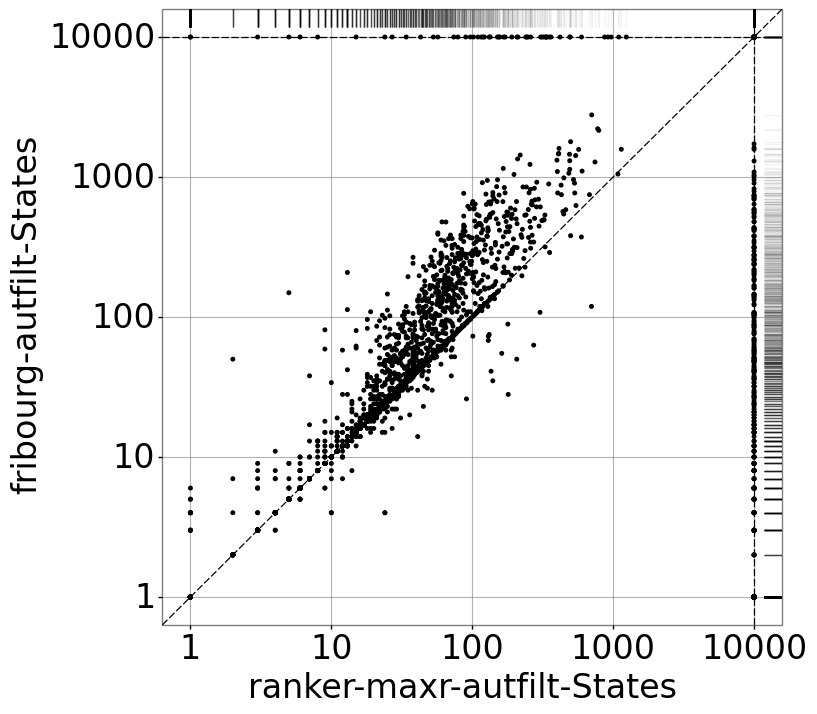

<ggplot: (347057035)>

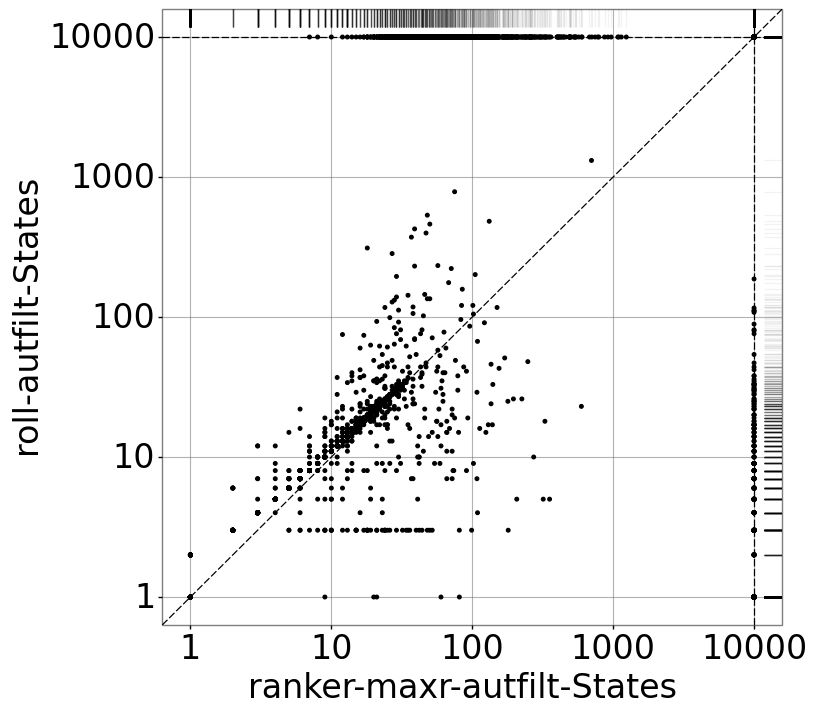

<ggplot: (346456242)>

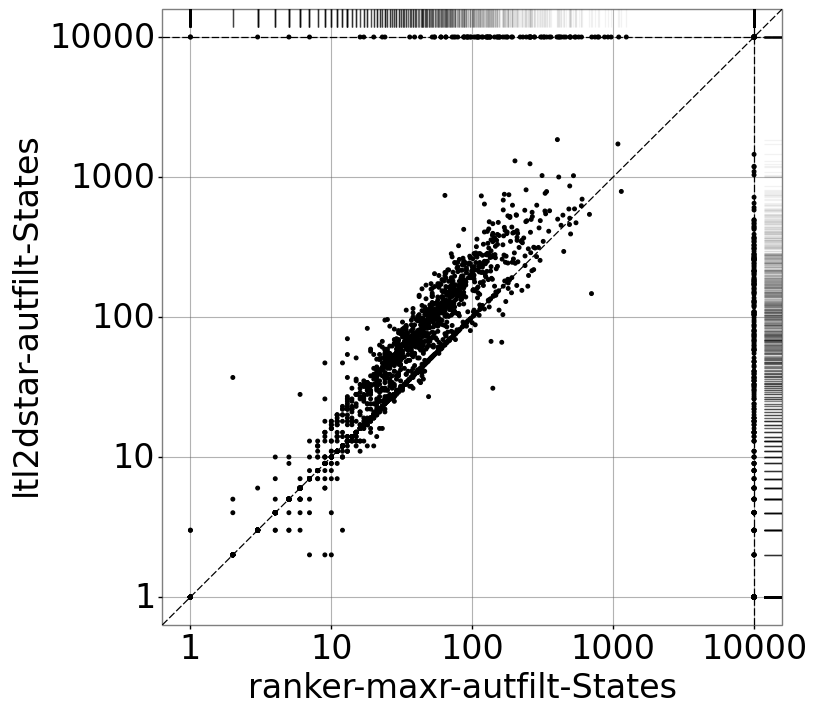

<ggplot: (347950264)>

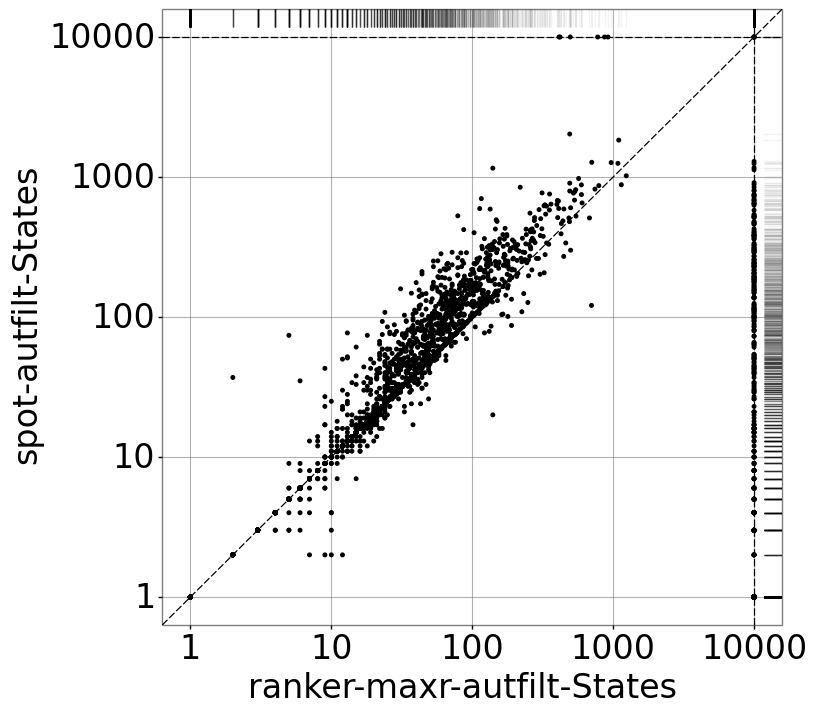

<ggplot: (347658849)>

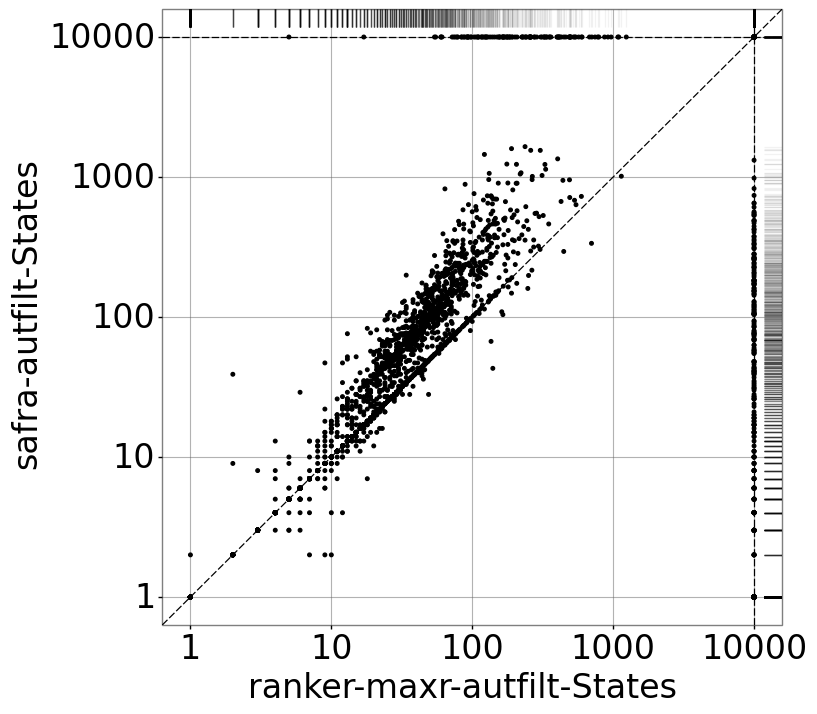

<ggplot: (346693422)>

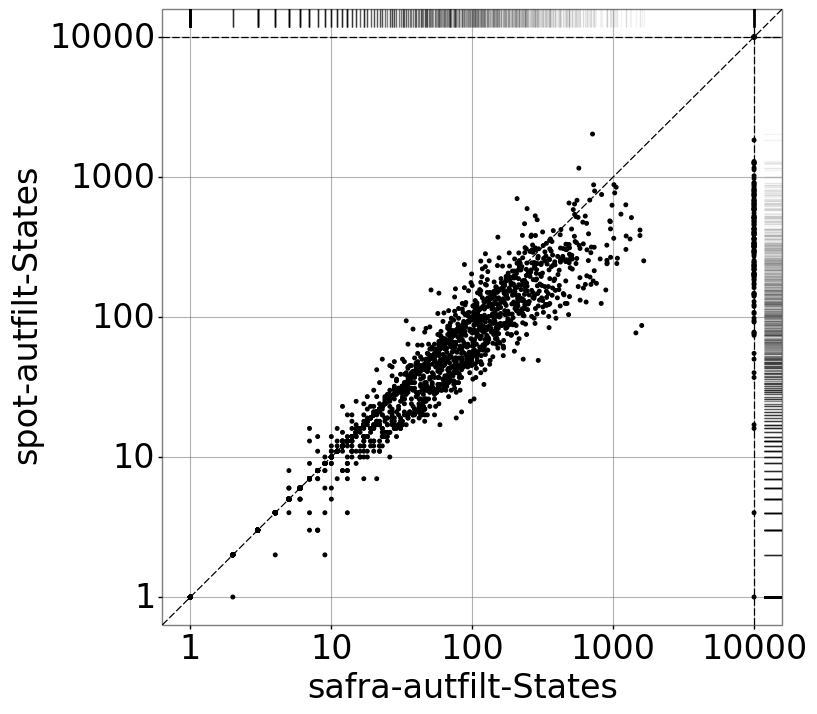

<ggplot: (348235358)>

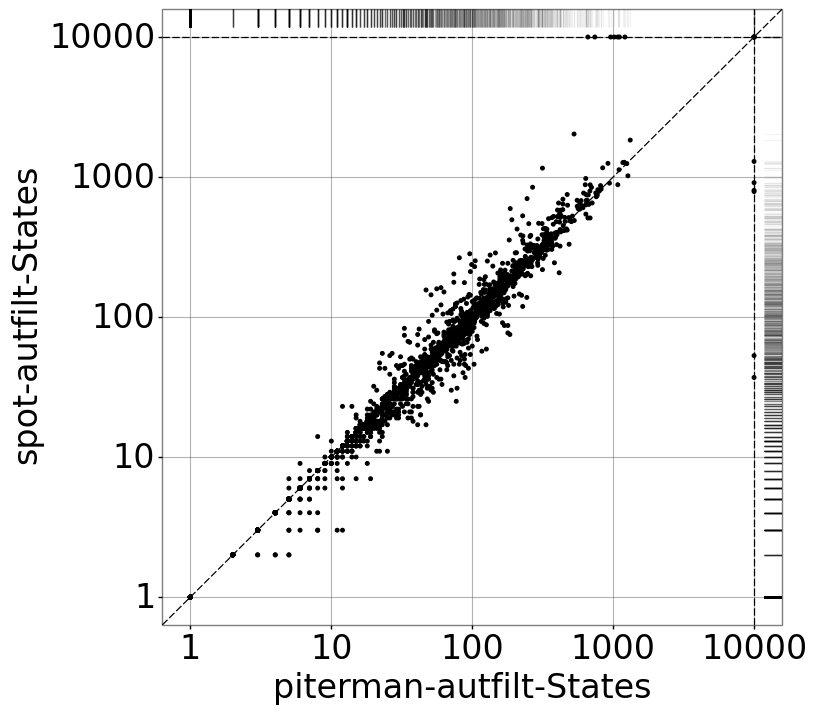

<ggplot: (348644036)>

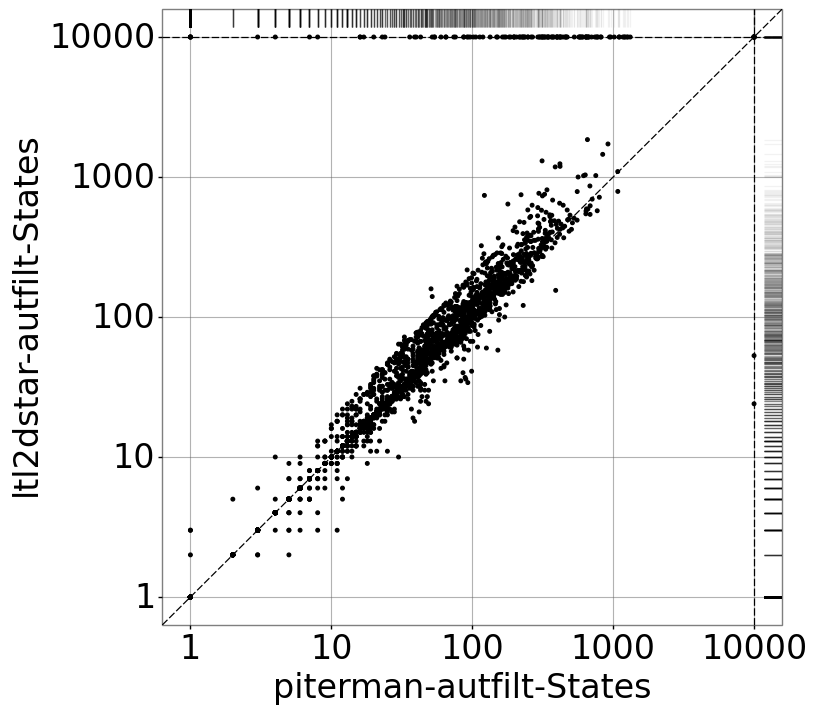

<ggplot: (348916170)>

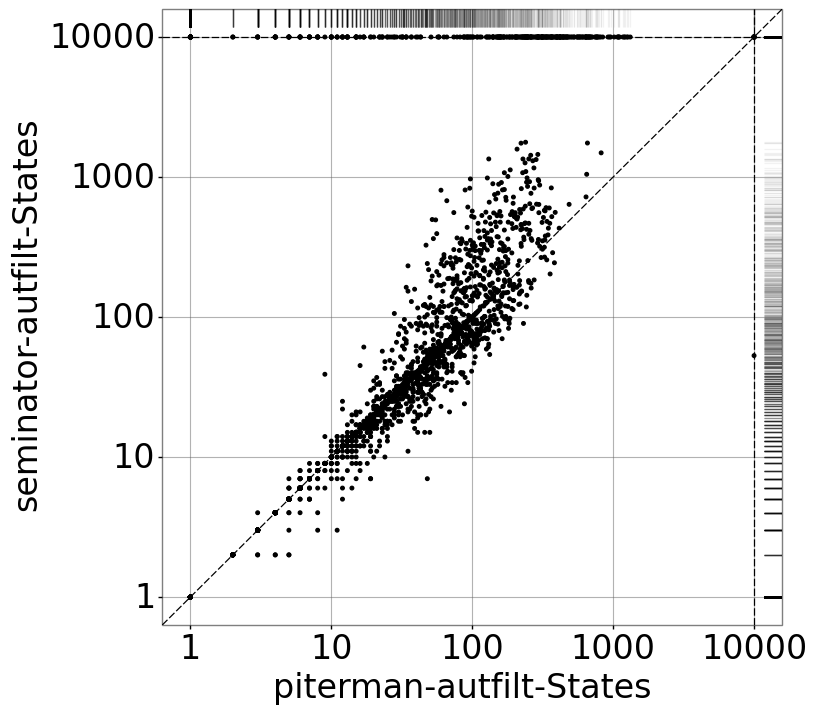

<ggplot: (348917125)>

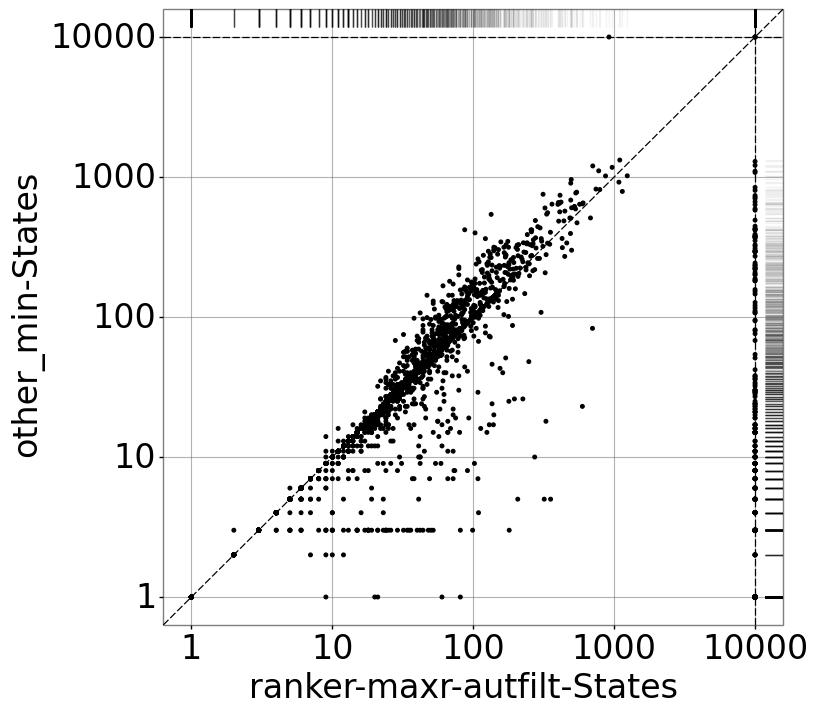

<ggplot: (348634691)>

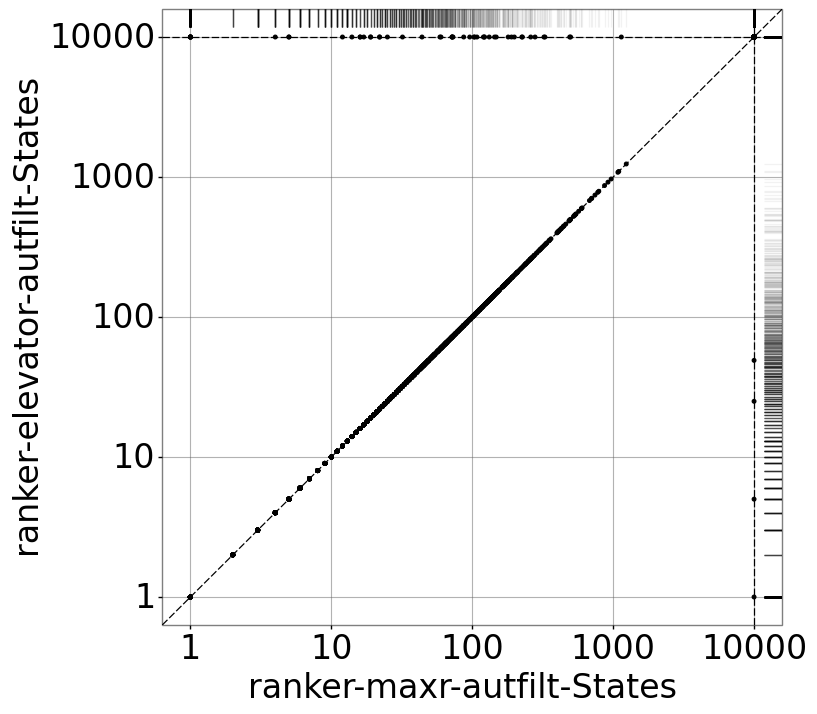

<ggplot: (346792217)>

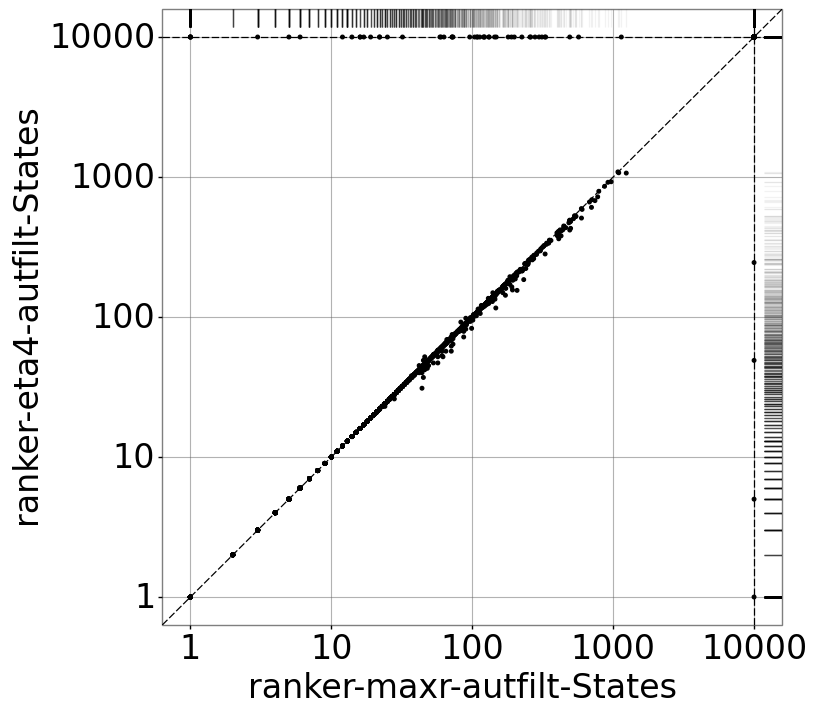

<ggplot: (347533809)>

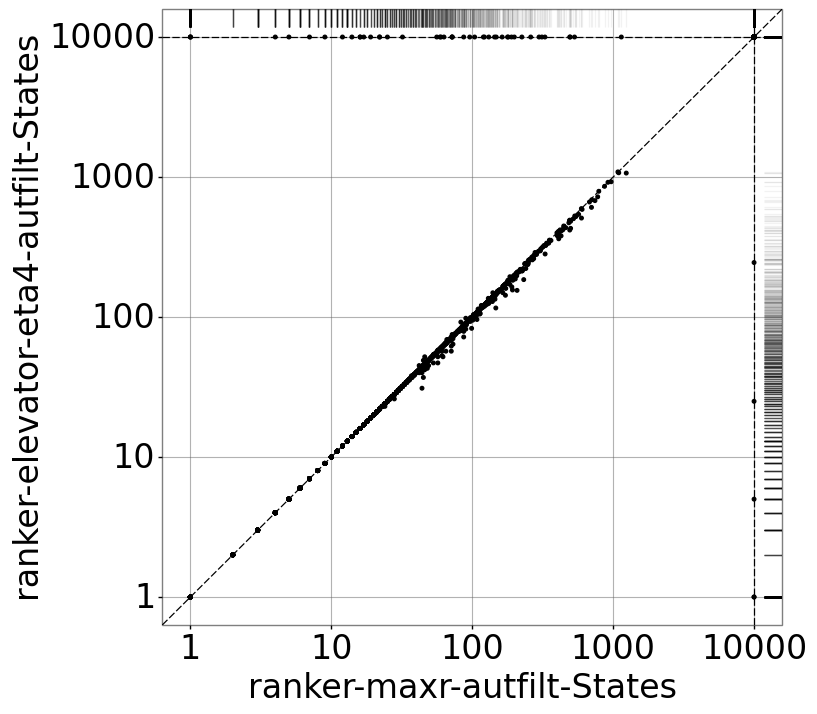

<ggplot: (347695168)>

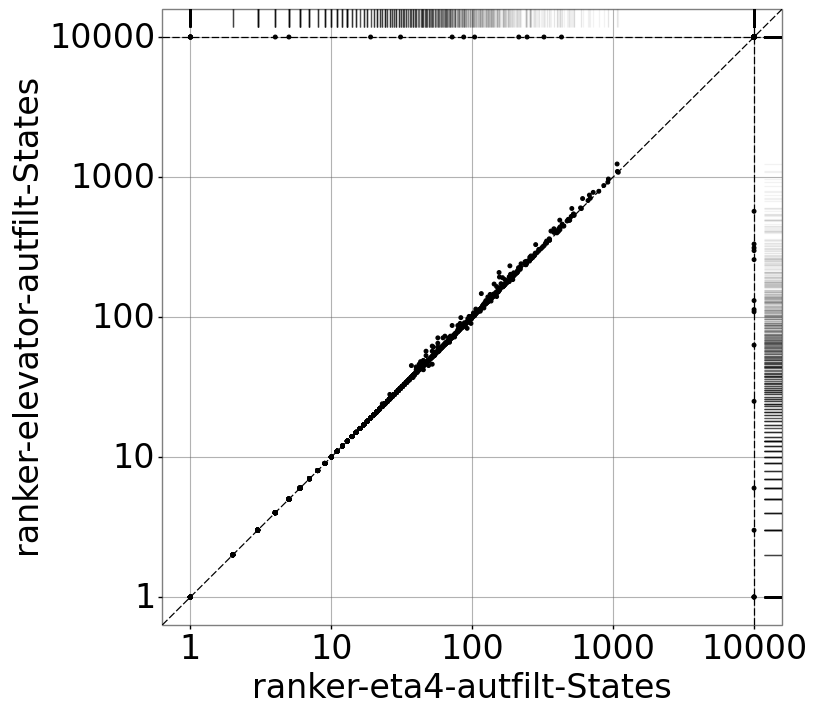

<ggplot: (346459004)>

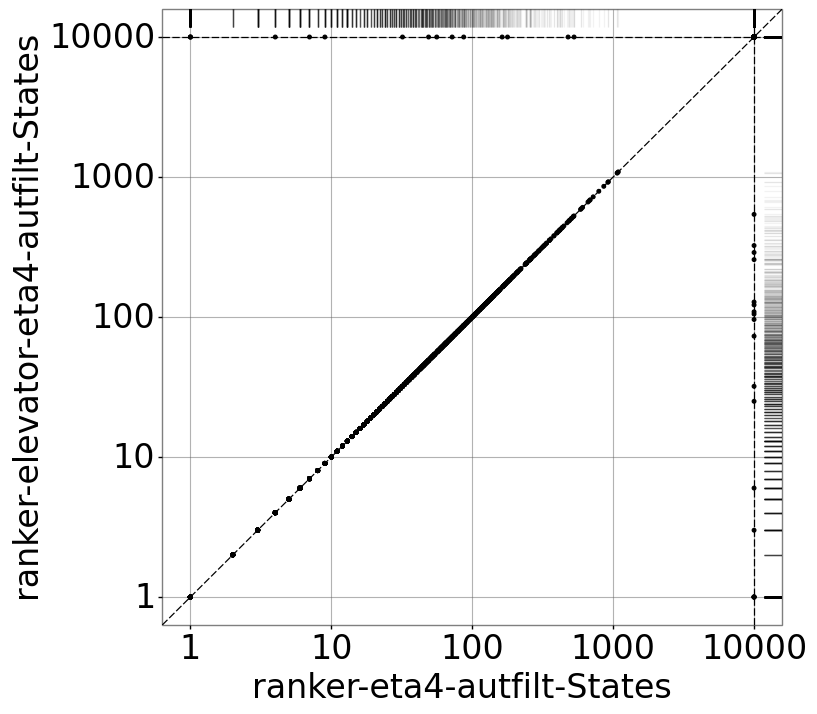

<ggplot: (347702366)>

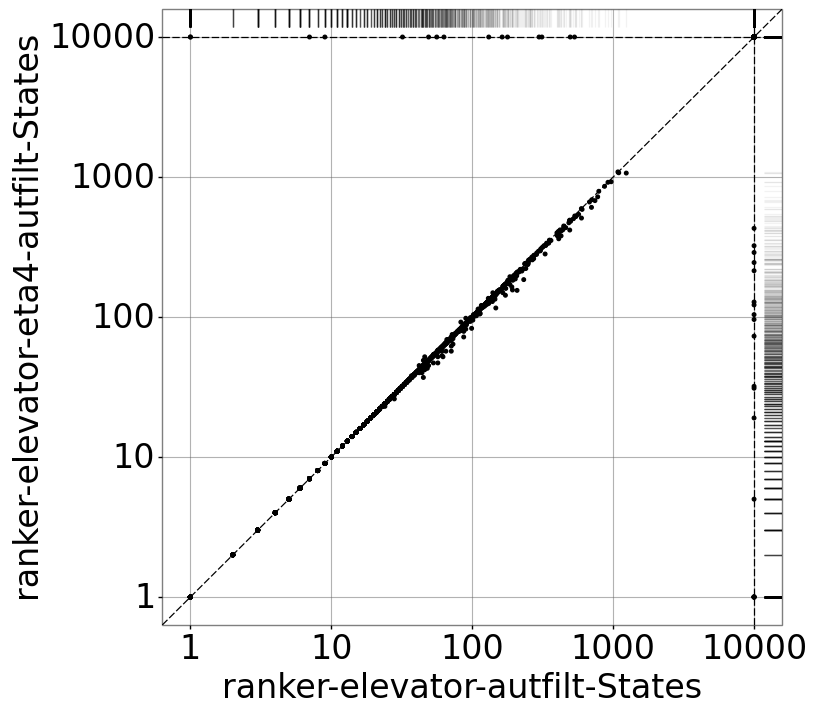

<ggplot: (348151257)>

In [29]:
display(scatplot({'x': 'ranker-maxr-nopost' , 'y': 'ranker-rrestr-nopost', 'max': states_timeout}))
display(scatplot({'x': 'ranker-maxr-nopost' , 'y': 'schewe', 'max': states_timeout}))
display(scatplot({'x': "ranker-maxr-autfilt", 'y': "seminator-autfilt"}))
display(scatplot({'x': "ranker-maxr-autfilt", 'y': "piterman-autfilt"}))
display(scatplot({'x': "ranker-maxr-autfilt", 'y': "fribourg-autfilt"}))
display(scatplot({'x': "ranker-maxr-autfilt", 'y': "roll-autfilt"}))
display(scatplot({'x': "ranker-maxr-autfilt", 'y': "ltl2dstar-autfilt"}))
display(scatplot({'x': "ranker-maxr-autfilt", 'y': "spot-autfilt"}))
display(scatplot({'x': "ranker-maxr-autfilt", 'y': "safra-autfilt"}))
display(scatplot({'x': "safra-autfilt"      , 'y': "spot-autfilt"}))
display(scatplot({'x': "piterman-autfilt"   , 'y': "spot-autfilt"}))
display(scatplot({'x': "piterman-autfilt"   , 'y': "ltl2dstar-autfilt"}))
display(scatplot({'x': "piterman-autfilt"   , 'y': "seminator-autfilt"}))
display(scatplot({'x': "ranker-maxr-autfilt", 'y': "other_min"}))
display(scatplot({'x': "ranker-maxr-autfilt", 'y': "ranker-elevator-autfilt"}))
display(scatplot({'x': "ranker-maxr-autfilt", 'y': "ranker-eta4-autfilt"}))
display(scatplot({'x': "ranker-maxr-autfilt", 'y': "ranker-elevator-eta4-autfilt"}))
display(scatplot({'x': "ranker-eta4-autfilt", 'y': "ranker-elevator-autfilt"}))
display(scatplot({'x': "ranker-eta4-autfilt", 'y': "ranker-elevator-eta4-autfilt"}))
display(scatplot({'x': "ranker-elevator-autfilt", 'y': "ranker-elevator-eta4-autfilt"}))


In [ ]:
# generate evaluation
def gen_evaluation(file_input, file_classification, out_prefix):
   

    # headers = ["name", "min", "max", "mean", "median", "std. dev", "timeouts"]
    headers = ["method", "max", "mean", "median", "std. dev", "timeouts"]
    print("######################################################################")
    print("####                        Table 1 (left)                        ####")
    print("######################################################################")
    print(tab.tabulate(tab_interesting, headers=headers, tablefmt="github"))
    table_to_file(tab_interesting, headers, out_prefix + "_table1left")
    print("\n\n")

   
    headers = ["method", "mean", "median", "std. dev"]
    # headers = ["method", "min", "max", "mean", "median", "std. dev", "timeouts"]
    print("######################################################################")
    print("####                           Table 2                            ####")
    print("######################################################################")
    print(tab.tabulate(tab_interesting, headers=headers, tablefmt="github"))
    table_to_file(tab_interesting, headers, out_prefix + "_table2")
    print("\n\n")

    # comparing wins/loses
    compare_methods = [("ranker-maxr-nopost-States", "ranker-rrestr-nopost-States"),
                       ("ranker-maxr-nopost-States", "schewe-States"),
                       ("ranker-maxr-autfilt-States", "piterman-autfilt-States"),
                       ("ranker-maxr-autfilt-States", "safra-autfilt-States"),
                       ("ranker-maxr-autfilt-States", "spot-autfilt-States"),
                       ("ranker-maxr-autfilt-States", "fribourg-autfilt-States"),
                       ("ranker-maxr-autfilt-States", "ltl2dstar-autfilt-States"),
                       ("ranker-maxr-autfilt-States", "seminator-autfilt-States"),
                       ("ranker-maxr-autfilt-States", "roll-autfilt-States"),

                      ]
 #   compare_methods = [("ranker-maxr-nopost-States", "ranker-rrestr-nopost-States"),
 #                      ("ranker-maxr-nopost-States", "schewe-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "piterman-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "safra-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "spot-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "fribourg-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "ltl2dstar-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "seminator-autfilt-States"),
 #                      ("ranker-maxr-bo-autfilt-States", "roll-autfilt-States"),
 #                      ]

    tab_wins = []
    for left, right in compare_methods  :
        left_over_right = df[df[left] < df[right]]
        right_timeouts = left_over_right[left_over_right[right] == states_timeout]

        right_over_left = df[df[left] > df[right]]
        left_timeouts = right_over_left[right_over_left[left] == states_timeout]

        tab_wins.append([right, len(left_over_right), len(right_timeouts), len(right_over_left), len(left_timeouts)])

    headers_wins = ["method", "wins", "wins-timeouts", "loses", "loses-timeouts"]
    print("######################################################################")
    print("####                        Table 1 (right)                       ####")
    print("######################################################################")
    print(tab.tabulate(tab_wins, headers=headers_wins, tablefmt="github"))
    table_to_file(tab_wins, headers_wins, out_prefix + "_table1right")
    print("\n\n")

    print("##############    other claimed results    ###############")

    ############# the best solution ##########
    df['other_min-States'] = df[
        ['safra-autfilt-States', 'piterman-autfilt-States',
         'spot-autfilt-States', 'fribourg-autfilt-States',
         'ltl2dstar-autfilt-States','seminator-autfilt-States',
         'roll-autfilt-States']].min(axis=1)

    ranker_best = df[df['ranker-maxr-autfilt-States'] < df['other_min-States']]
    ranker_not_best = df[df['ranker-maxr-autfilt-States'] > df['other_min-States']]

    num_ranker_not_strictly_best = len(df) - len(ranker_not_best)
    num_ranker_not_strictly_best_percent = "{:.1f}".format(num_ranker_not_strictly_best / len(df) * 100)
    num_ranker_strictly_best = len(ranker_best)
    num_ranker_strictly_best_percent = "{:.1f}".format(num_ranker_strictly_best / len(df) * 100)
    print(f"ranker non-strictly best: {num_ranker_not_strictly_best} (= {num_ranker_not_strictly_best_percent} %)")
    print(f"ranker stricly best: {num_ranker_strictly_best} (= {num_ranker_strictly_best_percent} %)")
    # print(f"ranker not best = {len(ranker_not_best)}")

    ###########   BackOff   ################
    backoff = df[df["ranker-maxr-bo-Engine"].str.contains("GOAL", na=False)]
    print(f"backoff executions: {len(backoff)}")

    to_cmp2 = [{'x': "ranker-maxr-nopost", 'y': "ranker-rrestr-nopost",
                'xname': 'Ranker-MaxR', 'yname': 'Ranker-RRestr'},
               {'x': "ranker-maxr-nopost", 'y': "schewe",
                'xname': "Ranker-MaxR", 'yname': "Schewe-RedAvgOut"},
               {'x': "ranker-maxr-autfilt", 'y': "seminator-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "Seminator 2+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "piterman-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "Piterman+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "fribourg-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "Fribourg+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "roll-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "ROLL+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "ltl2dstar-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "ltl2dstar+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "spot-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "Spot+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "safra-autfilt",
                'xname': "Ranker-MaxR+PP", 'yname': "Safra+PP",
                'max': 10000, 'tickCount': 3},
               {'x': "safra-autfilt", 'y': "spot-autfilt",
                'max': 10000, 'tickCount': 3},
               {'x': "piterman-autfilt", 'y': "spot-autfilt",
                'max': 10000, 'tickCount': 3},
               {'x': "piterman-autfilt", 'y': "ltl2dstar-autfilt",
                'max': 10000, 'tickCount': 3},
               {'x': "piterman-autfilt", 'y': "seminator-autfilt",
                'max': 10000, 'tickCount': 3},
      #         {'x': "piterman-gff-autfilt", 'y': "seminator-autfilt",
      #          'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "other_min",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "ranker-maxr-delayopt-autfilt",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-autfilt", 'y': "ranker-maxr-delayopt-new-autfilt",
                'max': 10000, 'tickCount': 3},
               {'x': "ranker-maxr-delayopt-autfilt", 'y': "ranker-maxr-delayopt-new-autfilt",
                'max': 10000, 'tickCount': 3},
              ]

    # add fields where not present
    for params in to_cmp2:
        if 'xname' not in params:
            params['xname'] = None
        if 'yname' not in params:
            params['yname'] = None
        if 'max' not in params:
            params['max'] = states_timeout
        if 'tickCount' not in params:
            params['tickCount'] = 5
        if 'filename' not in params:
            params['filename'] = "fig_" + params['x'] + "_vs_" + params['y']

    size = 8
    plot_list = [(params['x'],
                  params['y'],
                  params['filename'],
                  el.scatter_plot(df,
                               xcol=params['x'] + '-States',
                               ycol=params['y'] + '-States',
                               xname=params['xname'], yname=params['yname'],
                               domain=[states_min, params['max']],
                               tickCount=params['tickCount'],
                               log=True, width=size, height=size)) for params
                 in to_cmp2]

    print("\n\n")
    print("Generating plots...")
    for x, y, filename, plot in plot_list:
        filename = f"plots/{out_prefix}_{filename}.pdf"
        print(f"plotting x: {x}, y: {y}... saving to {filename}")
        # plot.save(filename, scale_factor=2)
        plot.save(filename=filename, dpi=1000)
        print(plot)

    # return benchmarks solvable only by 'engine'
    def only_solves(df, engine):
        # select those where engine finishes
        res = df[df[engine + '-States'] != states_timeout]
        for col in res.columns:
            if re.search('-States$', col) and not re.search(engine, col):
                res = res[res[col] == states_timeout]

        return res


    engines = ["ranker-maxr",
               "ranker-rrestr",
               "ranker-maxr-bo",
               "piterman",
               "safra",
               "spot",
               "fribourg",
               "ltl2dstar",
               "seminator",
               "roll",
              ]

    for i in engines:
        i_only_solves = only_solves(df, i)
        print(f"only {i} = " + str(len(i_only_solves)))
        if len(i_only_solves) > 0:
            print()
            print(tab.tabulate(i_only_solves, headers='keys'))
            print()

    def none_solves(df):
        # select those where engine finishes
        res = df
        for col in res.columns:
            if re.search('-States$', col):
                res = res[res[col] == states_timeout]

        return res

    unsolvable = none_solves(df)
    print("unsolvable: " + str(len(unsolvable)))
    print(tab.tabulate(unsolvable, headers='keys'))
    print("\n\n\n\n\n")

    # comparing delayopt on only terminating cases

    df_delay = df[(df['ranker-maxr-delayopt-runtime'] != TIMEOUT_VAL) &
                  (df['ranker-maxr-delayopt-new-runtime'] != TIMEOUT_VAL) &
                  (df['ranker-maxr-runtime'] != TIMEOUT_VAL)]

    print(df_delay)

    summary_states = dict()
    for col in df_delay.columns:
        if re.search('-States$', col) or re.search('-runtime$', col):
            summary_states[col] = dict()
            summary_states[col]['max'] = df_delay[col].max()
            summary_states[col]['min'] = df_delay[col].min()
            summary_states[col]['mean'] = df_delay[col].mean()
            summary_states[col]['median'] = df_delay[col].median()
            summary_states[col]['std'] = df_delay[col].std()
            summary_states[col]['timeouts'] = len(df_delay[df_delay[col] == states_timeout])

    df_summary_states = pd.DataFrame(summary_states).transpose()

    print(tab.tabulate(df_summary_states, headers='keys', tablefmt="github"))

   # df_piterman_gff = df[(df['piterman-gff-autfilt-States'] == 1) & (df['seminator-autfilt-States'] > 500)]
   # print(tab.tabulate(df_piterman_gff, headers='keys'))

#############################################################################
############################## ENTRY POINT ##################################
#############################################################################

#gen_evaluation("results/results-2021-01-21/random-all-to300-new-22jan21.csv",
#               "random-all-compact-classification.csv",
#               "random-all")
#
#gen_evaluation("results/results-2021-01-04/from_ltl_red-to300-new-jan21.csv",
#               "from_ltl_classification.csv",
#               "from_ltl")

#gen_evaluation("results/results-2021-01-04/pokus.csv",
#               "random-all-classification.csv",
#               "gff")

gen_evaluation("results/results-2021-05-28-delayopt-new/random-all-to300-plus-ranker-delayopt-new.csv",
               "random-all-compact-classification.csv",
               "random-all")

#gen_evaluation("results/results-2021-05-19-roll/random-all-to300-roll-new-may19-connected.csv",
#               "random-all-compact-classification.csv",
#               "random-all")

In [ ]:
print("ahoj")